# Maximum Likelihood Estimator (MLE) example

![](Schema_exp.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def eg_mle(lmbd_true=10,N_draws=100,exp_range=[1,20], do_plot=True):
    
    draws = np.random.exponential(scale=lmbd_true, size=N_draws)
    observed_draws = draws[np.all([draws<exp_range[1],draws>exp_range[0]],axis=0)]
    
    lmbd_mean = observed_draws.mean()
    
    lmbds = np.linspace(0.01,100,10_000)
    log_like = - observed_draws.mean()/lmbds - np.log(lmbds) - np.log(np.exp(-exp_range[0]/lmbds) - np.exp(-exp_range[1]/lmbds))
    
    # No need for a SGD here as we are in 1D and already can estimate the range
    lmbd_mle = lmbds[np.argmax(log_like)] 
    
    MLE_best = np.abs(lmbd_mle - lmbd_true) < np.abs(lmbd_mean - lmbd_true)

    if do_plot:
        plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.plot(draws,np.zeros(N_draws),'*',label='draws')
        plt.plot(observed_draws,np.zeros(observed_draws.size),'*',label='observed draws')

        plt.plot(lmbd_true,0,'o',markersize=15,label='$\lambda_{True}$')
        plt.plot(lmbd_mean,0,'o',markersize=15,label='$\lambda_{mean}$')
        plt.plot(lmbd_mle,0,'o',markersize=15,label='$\lambda_{MLE}$')

        plt.vlines(exp_range[0],-0.5,0.5,label='exp range')
        plt.vlines(exp_range[1],-0.5,0.5)
        plt.xlabel('distance')
        plt.legend()
    
        print('True value of lambda is : {}'.format(lmbd_true))
        print('Estimate through mean : {}'.format(lmbd_mean))
        print('Estimate through MLE : {}'.format(lmbd_mle))
        print('Best estimate is {}'.format('MLE' if MLE_best else 'Mean'))
    
    return MLE_best, lmbd_mle, lmbd_mean, observed_draws.size

True value of lambda is : 10
Estimate through mean : 8.042521434505343
Estimate through MLE : 11.74
Best estimate is MLE


(True, 11.74, 8.042521434505343, 76)

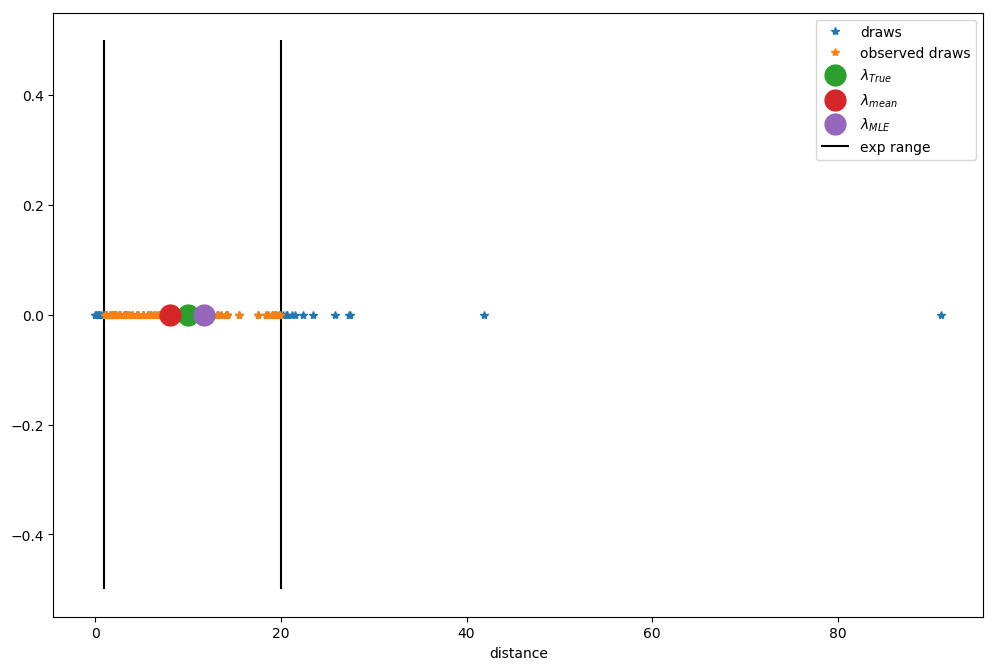

In [2]:
eg_mle()

If the experience range is infinite, MLE estimator isn't always the best suited

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
def compare_mle_mean(min_draw, max_draws, N_try, 
                     exp_range, lmbd_true):
    
    N_draws_vec = np.linspace(min_draw,max_draws,30).astype(int)
    MLE_best = np.empty((N_draws_vec.size,N_try))
    mle = np.empty((N_draws_vec.size,N_try))
    mean = np.empty((N_draws_vec.size,N_try))
    size_observed = np.empty((N_draws_vec.size,N_try))

    for i_draw in range(N_draws_vec.size):
        for i_try in range(N_try):
            (MLE_best[i_draw, i_try], 
             mle[i_draw,i_try], 
             mean[i_draw,i_try], 
             size_observed[i_draw,i_try]) = eg_mle(lmbd_true=lmbd_true,
                                                     N_draws=N_draws_vec[i_draw],
                                                     exp_range=exp_range,
                                                     do_plot=False)

    plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    plt.errorbar(N_draws_vec,MLE_best.mean(axis=1)*100,yerr=MLE_best.std(axis=1)*100)
    plt.hlines(50,N_draws_vec[0],N_draws_vec[-1])
    plt.xlabel('N')
    plt.ylabel('MLE better than mean (%)')

    plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    plt.errorbar(N_draws_vec,np.abs(mle-lmbd_true).mean(axis=1),yerr=np.abs(mle-lmbd_true).std(axis=1),label = 'MLE')
    plt.errorbar(N_draws_vec,np.abs(mean-lmbd_true).mean(axis=1),yerr=np.abs(mean-lmbd_true).std(axis=1),label = 'Mean')
    plt.legend()    
    plt.xlabel('N')
    plt.ylabel('Absolute error of MLE estimator')
    plt.hlines(0,N_draws_vec[0],N_draws_vec[-1])
    
    plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    plt.title('N = {}'.format(N_draws_vec[1]))
    plt.hist(mle[1],density=True,label='MLE')
    plt.hist(mean[1],density=True,label='Mean')
    gaussian = lambda x, mu, var : 1/np.sqrt(2*np.pi*var) * np.exp(-((x-mu)**2)/(2*var))
    xs = np.linspace(mle[1].min(),mle[1].max(),200)
    plt.plot(xs,gaussian(xs,lmbd_true,lmbd_true**2/N_draws_vec[1]))
    plt.legend()

    plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    plt.title('N = {}'.format(N_draws_vec[-2]))
    plt.hist(mle[-2],density=True,label='MLE')
    plt.hist(mean[-2],density=True,label='Mean')
    xs = np.linspace(mle[-2].min(),mle[-2].max(),200)
    plt.plot(xs,gaussian(xs,lmbd_true,lmbd_true**2/N_draws_vec[-2]))
    plt.legend()


True value of lambda is : 10
Estimate through mean : 10.0762984606611
Estimate through MLE : 10.08
Best estimate is Mean


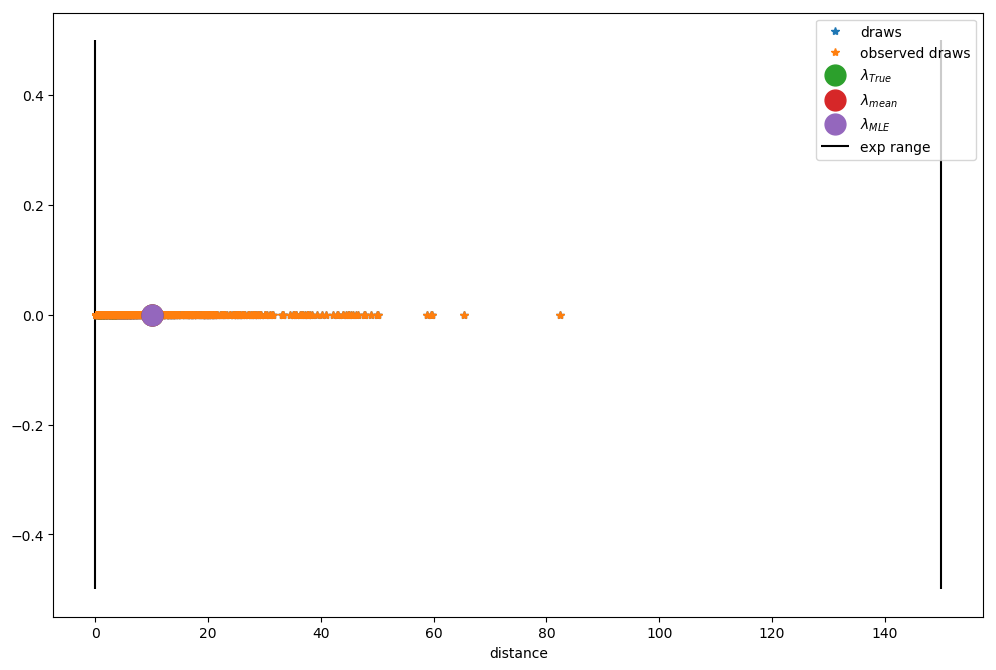

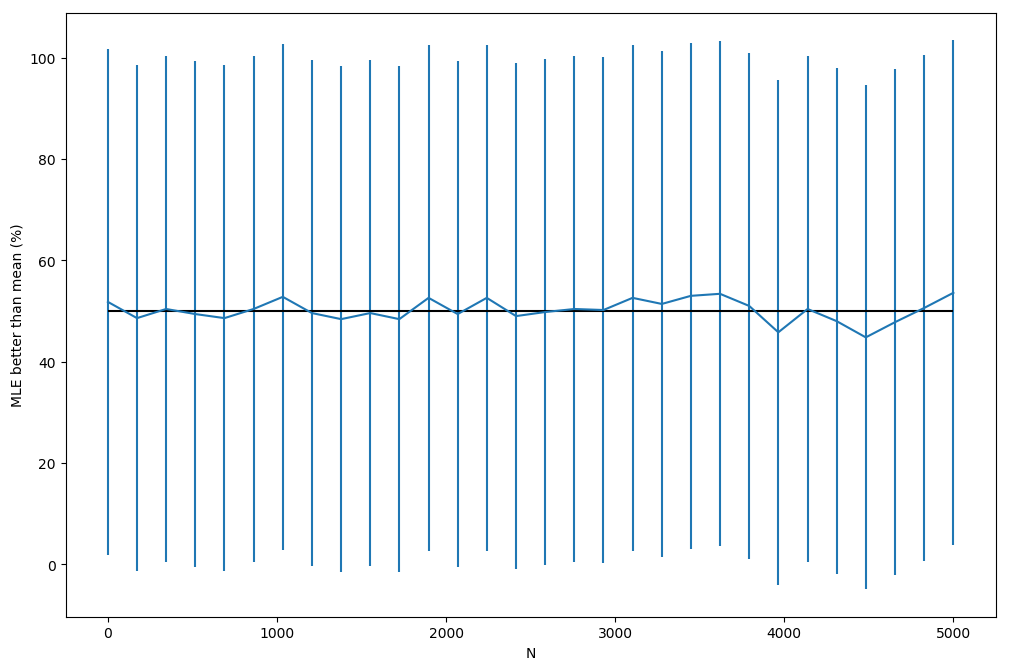

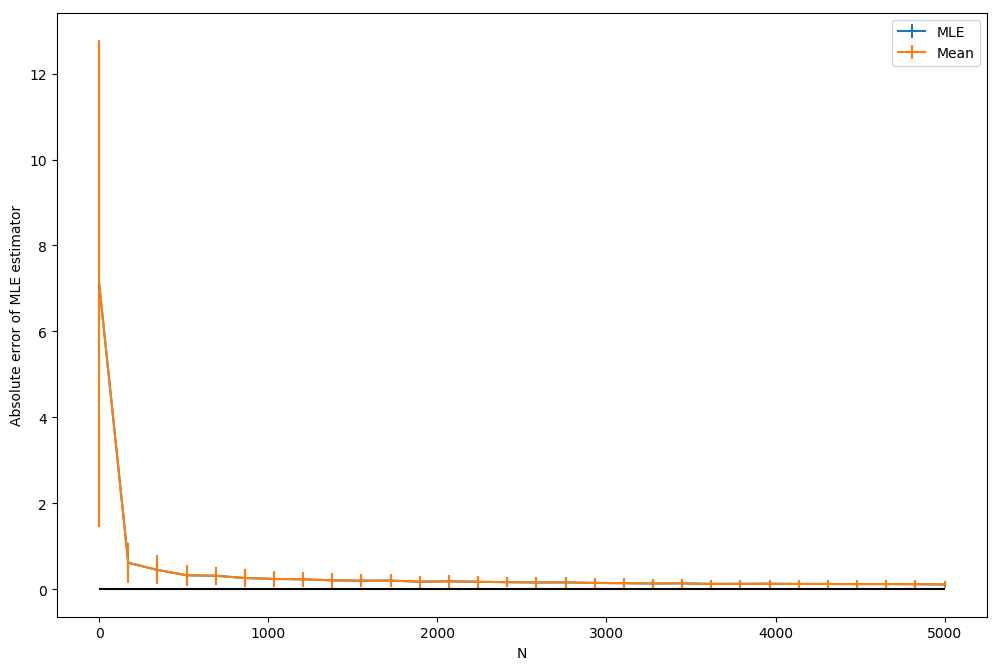

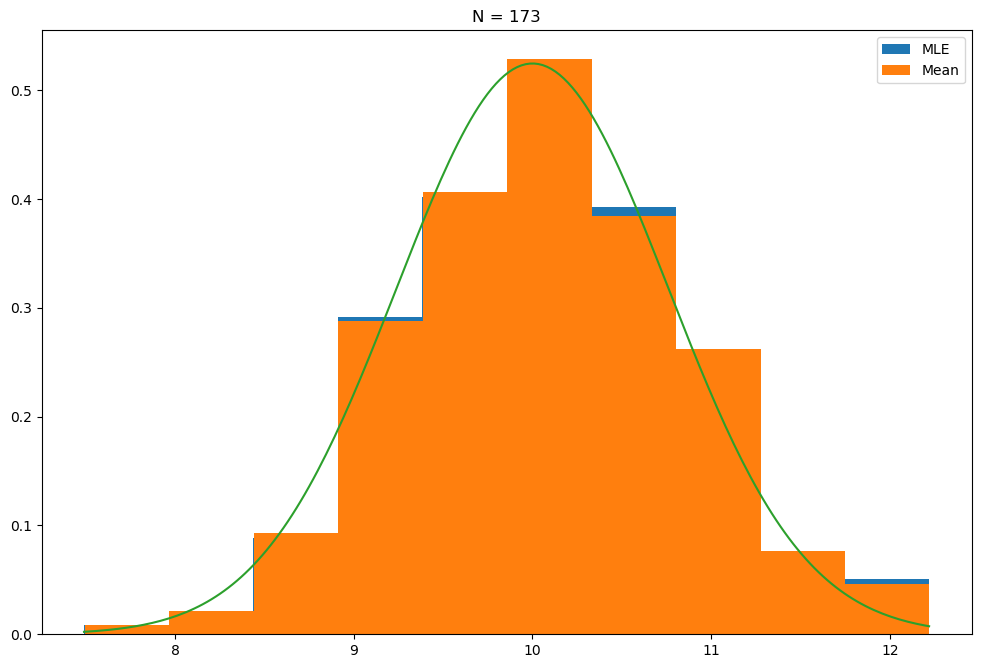

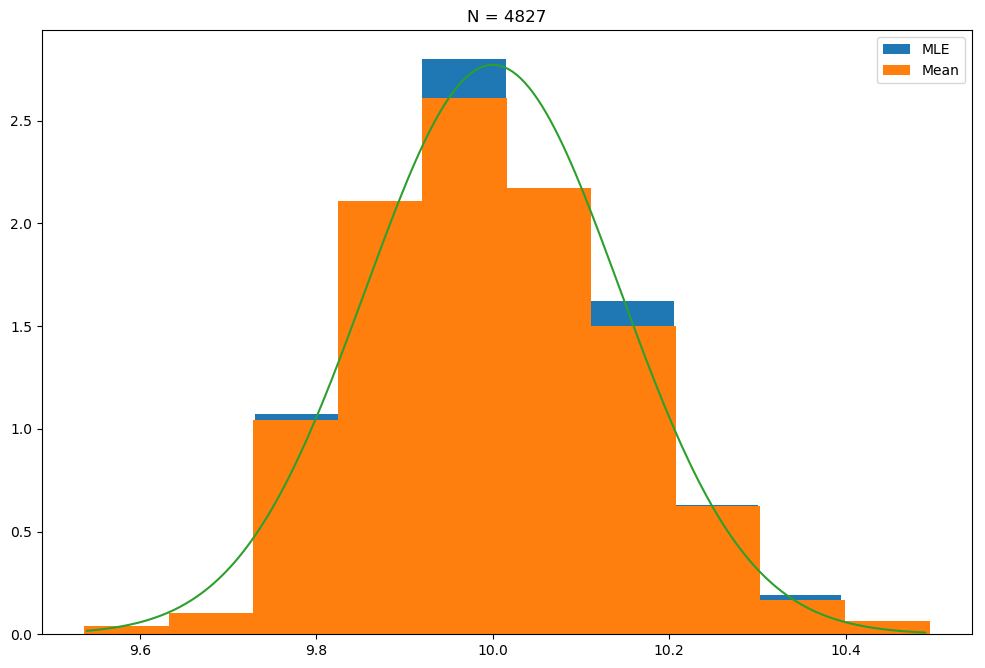

In [5]:
eg_mle(exp_range=[1e-10,150], N_draws=1_000)
compare_mle_mean(min_draw = 1, max_draws = 5_000, N_try = 500, 
                     exp_range = [1e-10,1_000], lmbd_true = 10)

We know that the mean of an exponential distribution is equal to $\lambda$, so we expected the Mean-estimator to perform correctly

In those graphs, we can see that with an infinite experience range :
* MLE & Mean estimators are equivalent
* They are both converging to the true value of $\lambda$ at the **same pace**
* This is not surprising, as MLE = Mean with infinite range !
* They are **unbiased**
* We can verify the Central Limit Theorem (CLT) in this example as well

But if the experience range is not infinite, MLE estimator is way better, even if $\lambda$ is in the experience range !

True value of lambda is : 10
Estimate through mean : 7.704650888305369
Estimate through MLE : 10.19
Best estimate is MLE


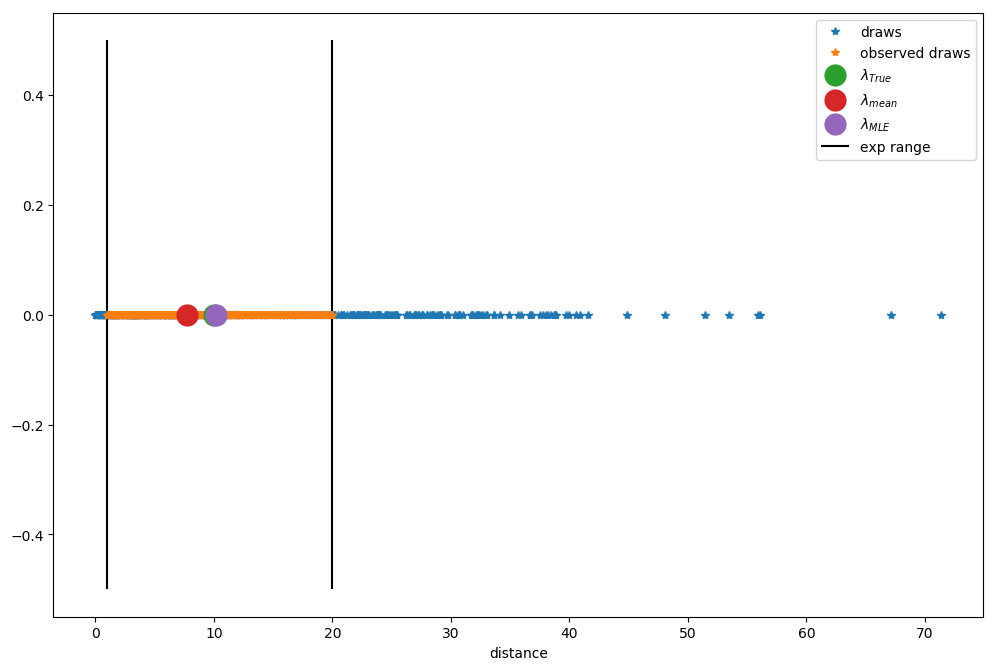

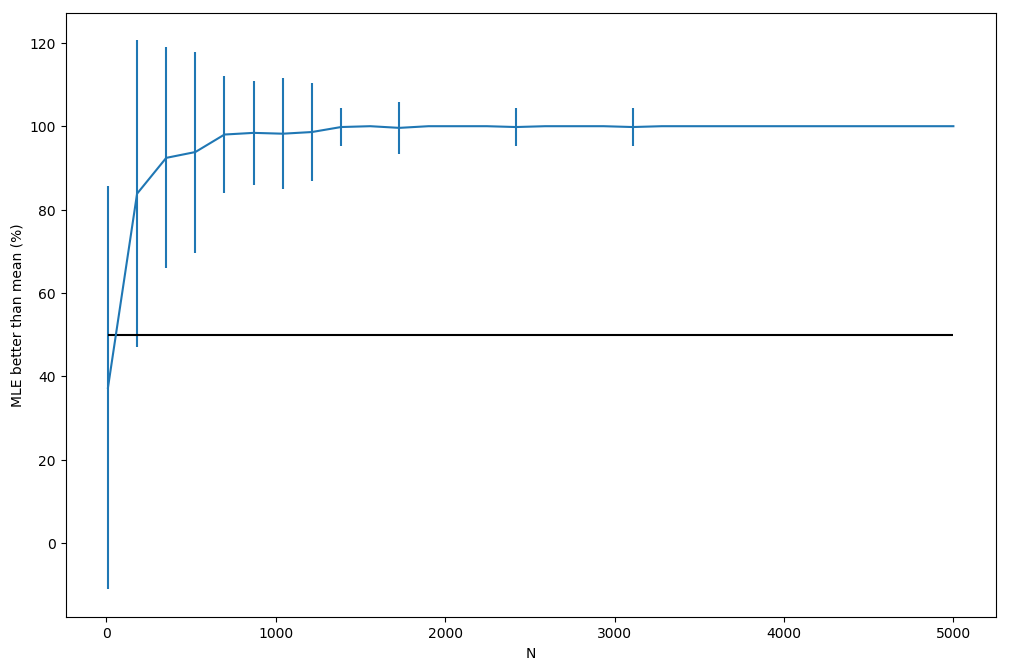

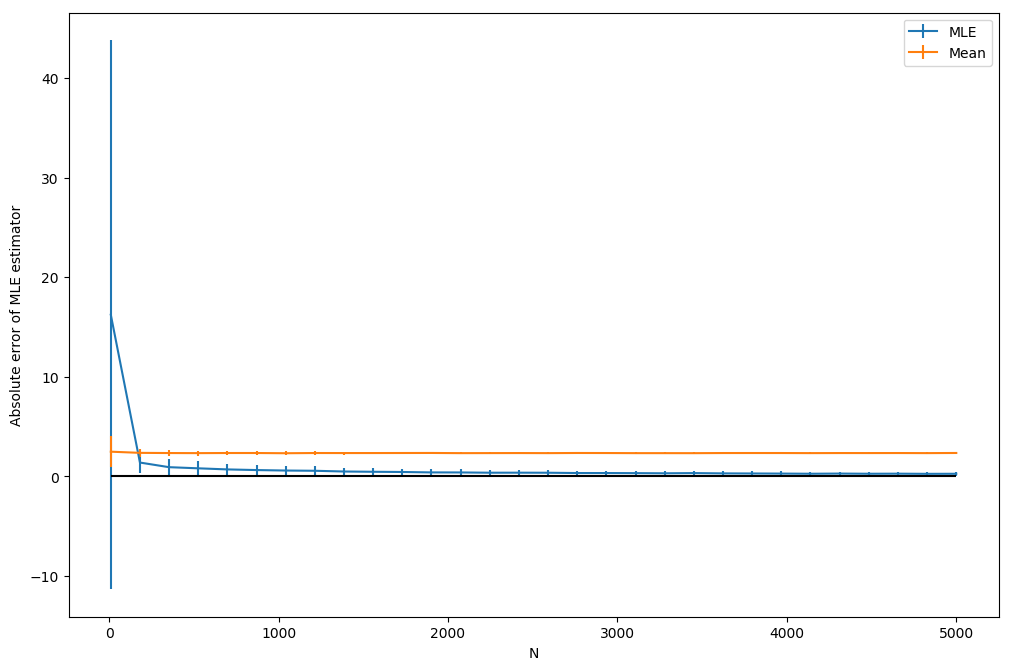

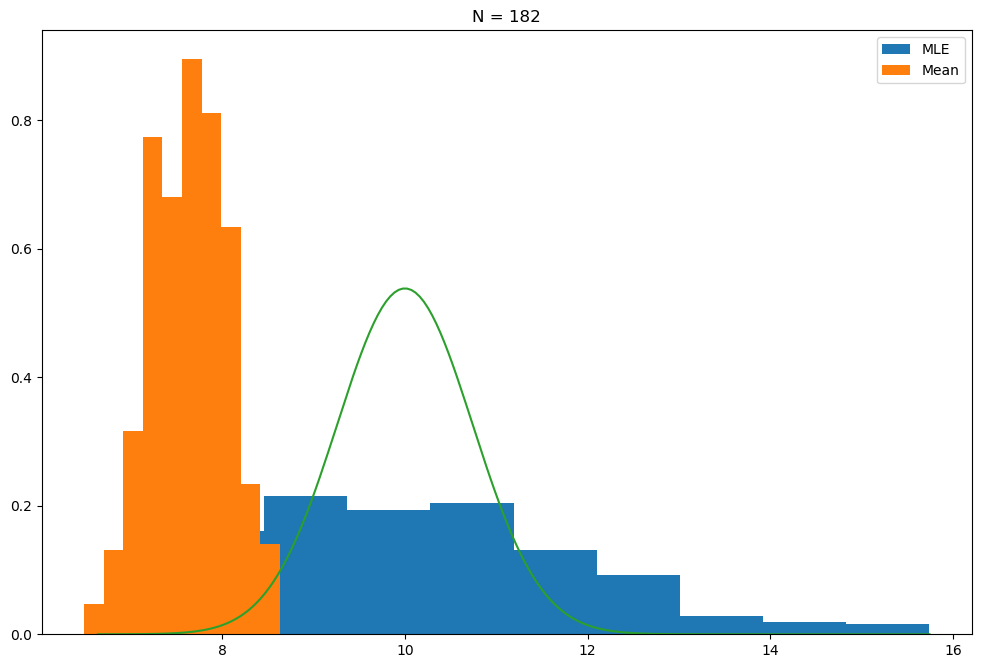

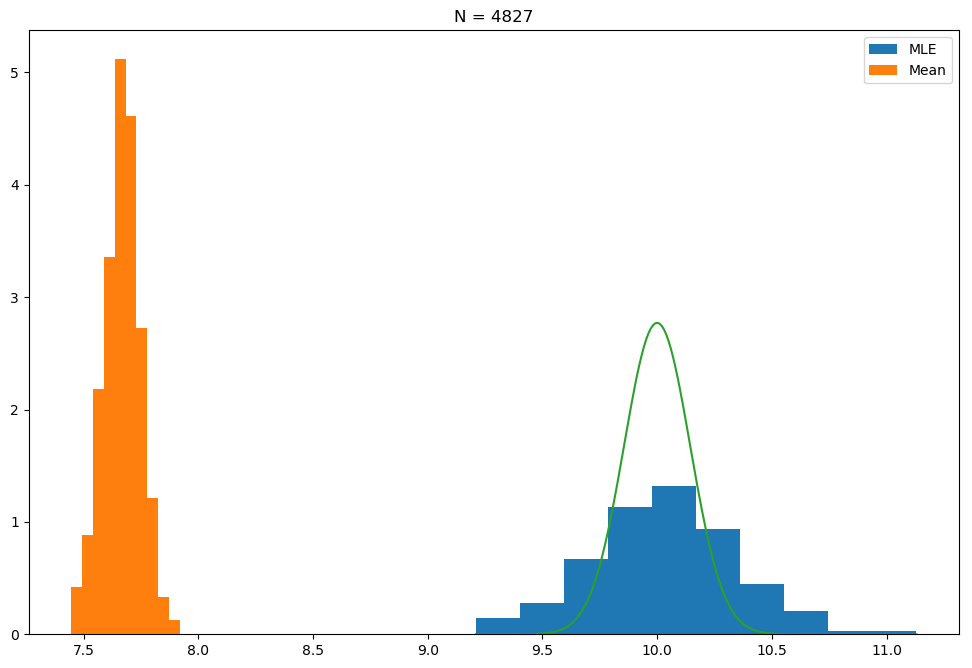

In [6]:
eg_mle(exp_range=[1,20], N_draws=1_000)
compare_mle_mean(min_draw = 10, max_draws = 5_000, N_try = 500, 
                     exp_range = [1,20], lmbd_true = 10)


Here we can see that :
* As expected, the MLE is way better than the Mean-estimator, Mean-estimator being less than the true $\lambda$. This is due to the fact that the exponential distribution has a **"heavy tail"** : Far from it's mean it still continues to have a *high* probability distribution (compared to a gaussian)

* This means that the Mean-estimator is **biased** contrarly to the MLE (they do not convergne to the same value)

* We also see that the CLT seems a bit off (the variance of the distribution being higher than the expected one)... Why is that so and how can we tackle this problem ?

* We can also see an example of the bias-variance tradeoff




Obvisouly, if $\lambda \notin$ experience range, MLE estimator is usually better...

True value of lambda is : 25
Estimate through mean : 9.383977374184244
Estimate through MLE : 26.73
Best estimate is MLE


/home/julienh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/home/julienh/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/julienh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]


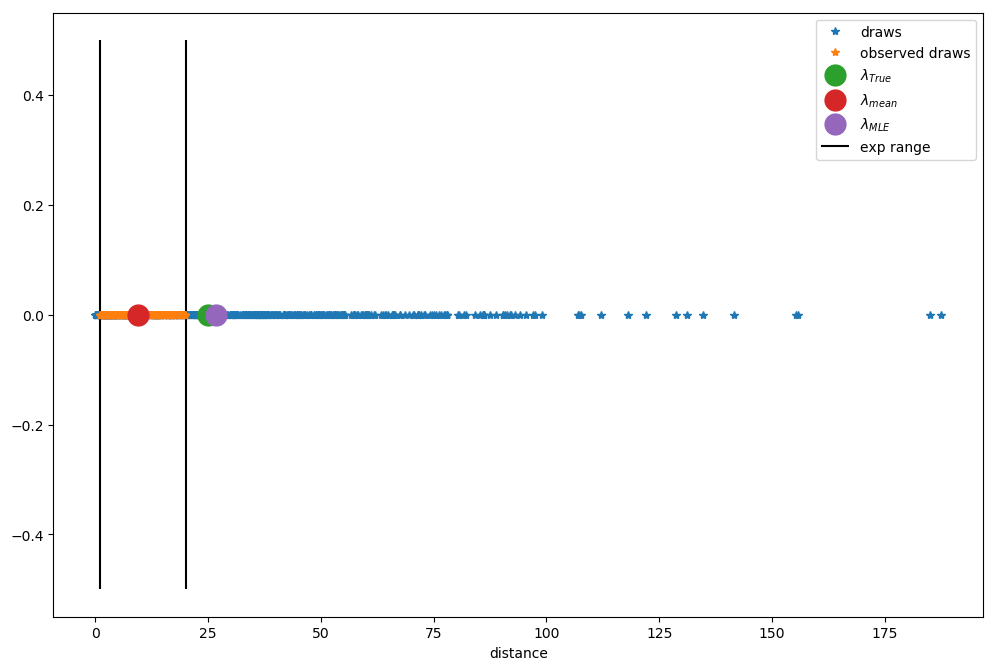

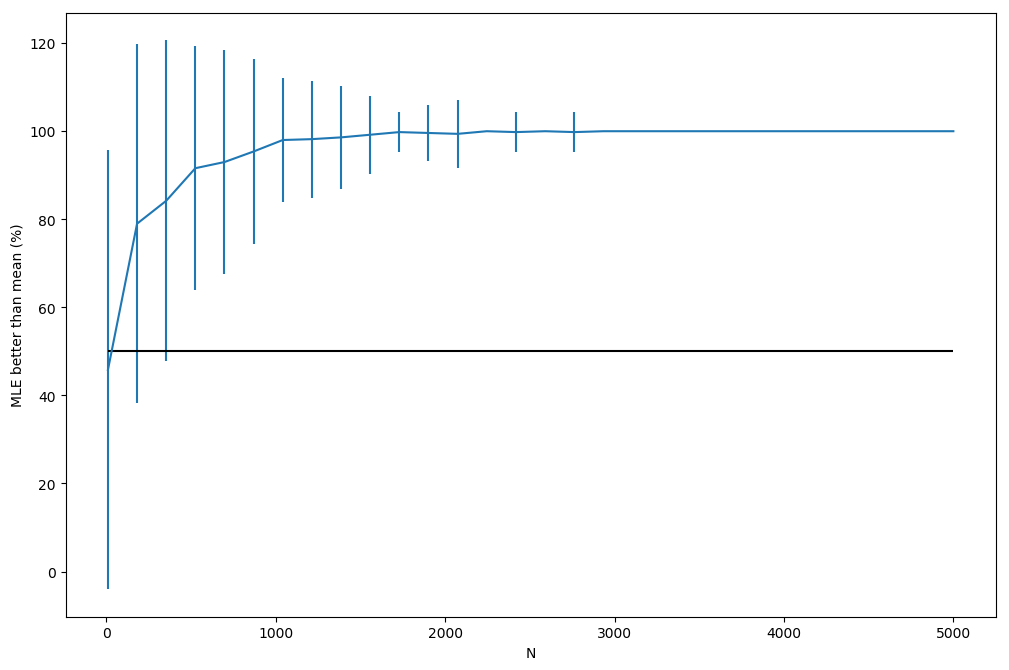

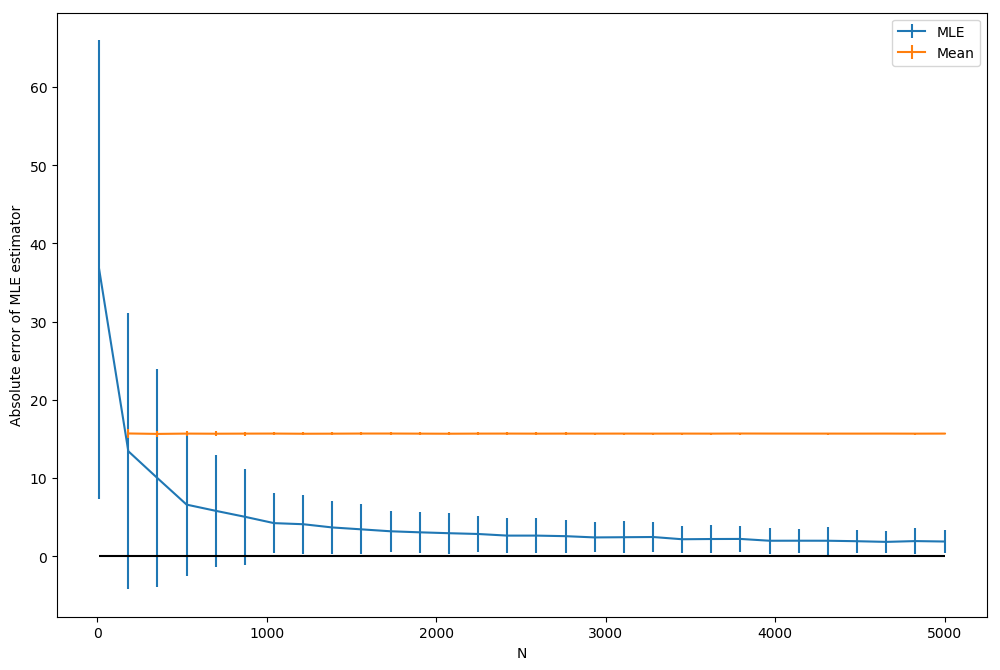

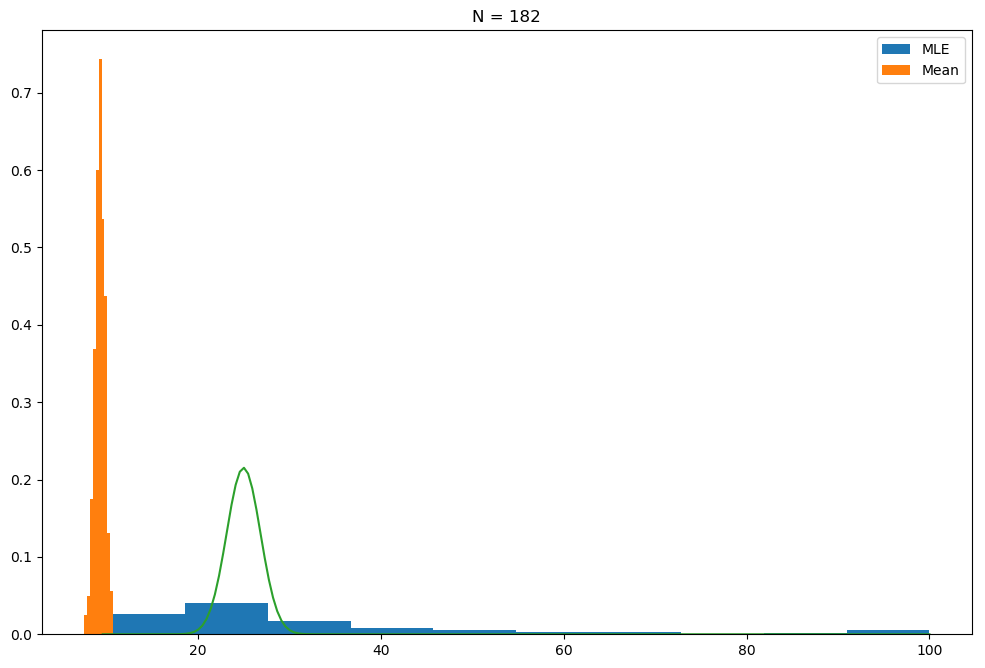

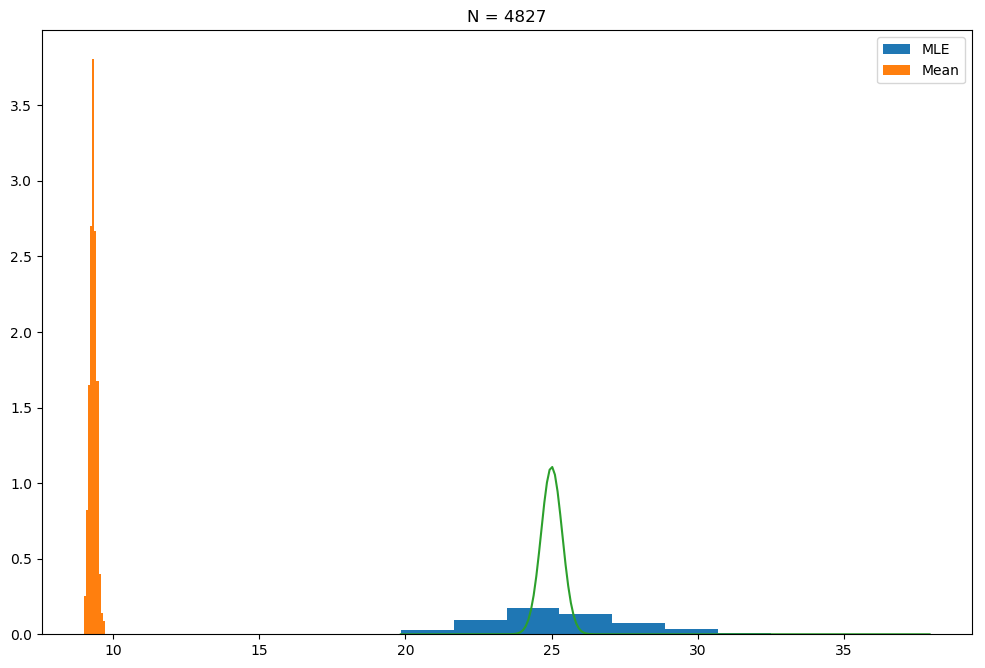

In [7]:
eg_mle(exp_range=[1,20], N_draws=1_000, lmbd_true=25)

compare_mle_mean(min_draw = 10, max_draws = 5_000, N_try = 500, 
                     exp_range = [1,20], lmbd_true = 25)

What about minimizing the risk (with MSE loss) ?

We try different values of $\lambda$ and select the one which corresponds the best to our draws !

In [8]:
def eg_mle_2(lmbd_true=10,N_draws=100,exp_range=[1,20], do_plot=True, N_draws_test=1000):
    
    draws = np.random.exponential(scale=lmbd_true, size=N_draws)
    observed_draws = draws[np.all([draws<exp_range[1],draws>exp_range[0]],axis=0)]
    
    bins = np.linspace(exp_range[0],exp_range[1],int(np.sqrt(observed_draws.size)))
    hist, _ = np.histogram(observed_draws,bins=bins,density=True)
        
    lmbds = np.linspace(0.01,100,10_000)
    log_like = - observed_draws.mean()/lmbds - np.log(lmbds) - np.log(np.exp(-exp_range[0]/lmbds) - np.exp(-exp_range[1]/lmbds))
    
    # No need for a SGD here as we are in 1D and already can estimate the range
    lmbd_mle = lmbds[np.argmax(log_like)] 
    
    MSE = np.empty(lmbds.size)
    for i_lmbd in range(lmbds.size):
        draws_test = np.random.exponential(scale=lmbds[i_lmbd],size=N_draws)
        observed_draws_test = draws_test[np.all([draws_test<exp_range[1],draws_test>exp_range[0]],axis=0)]
        hist_test, _ = np.histogram(draws_test, bins=bins, density=True) 
        MSE[i_lmbd] = ((hist - hist_test)**2).mean()
    
    lmbd_test = lmbds[np.nanargmin(MSE)]
    
    MLE_best = np.abs(lmbd_mle - lmbd_true) < np.abs(lmbd_test - lmbd_true)

    if do_plot:
        plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.plot(draws,np.zeros(N_draws),'*',label='draws')
        plt.plot(observed_draws,np.zeros(observed_draws.size),'*',label='observed draws')

        plt.plot(lmbd_true,0,'o',markersize=15,label='$\lambda_{True}$')
        plt.plot(lmbd_test,0,'o',markersize=15,label='$\lambda_{test}$')
        plt.plot(lmbd_mle,0,'o',markersize=15,label='$\lambda_{MLE}$')

        plt.vlines(exp_range[0],-0.5,0.5,label='exp range')
        plt.vlines(exp_range[1],-0.5,0.5)
        plt.xlabel('distance')
        plt.legend()
    
    
        print('True value of lambda is : {}'.format(lmbd_true))
        print('Estimate through test : {}'.format(lmbd_test))
        print('Estimate through MLE : {}'.format(lmbd_mle))
        print('Best estimate is {}'.format('MLE' if MLE_best else 'test'))
    
    return MLE_best, lmbd_mle, lmbd_test, observed_draws.size

/home/julienh/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


True value of lambda is : 10
Estimate through test : 6.22
Estimate through MLE : 6.0
Best estimate is test


(False, 6.0, 6.22, 85)

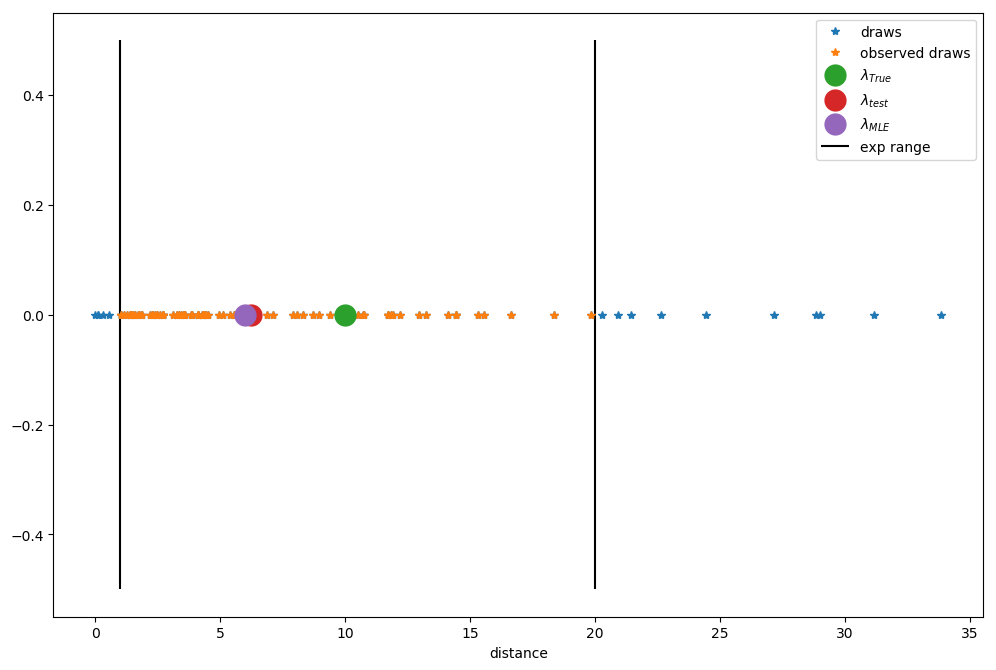

In [9]:
eg_mle_2()

In [12]:
%timeit eg_mle(do_plot=False)
%timeit eg_mle_2(do_plot=False)

1.48 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


/home/julienh/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


1.26 s ± 62.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We have a computation time ~ 1.000 times higher  
The computation time scales to the dimension of $\lambda$  
MLE doesn't scale with the dimension of $\lambda$ (even though there would be some issues to find the minimum in  higher dimensions)

Also you're highly dependant to other parameters :
* The number of $\lambda$ you try
* The number of bins you use for your histograms (a good guess would be $\sqrt{N_{observed}}$
* The number of samplings you will draw in you test distribution (which should depend on $\lambda$...)

And it's not even that good...  
(Couldn't do the same tests as with the Mean-estimator, as it take way too much time)

/home/julienh/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


True value of lambda is : 15
Estimate through test : 59.58
Estimate through MLE : 11.53
Best estimate is MLE


(True, 11.53, 59.58, 71)

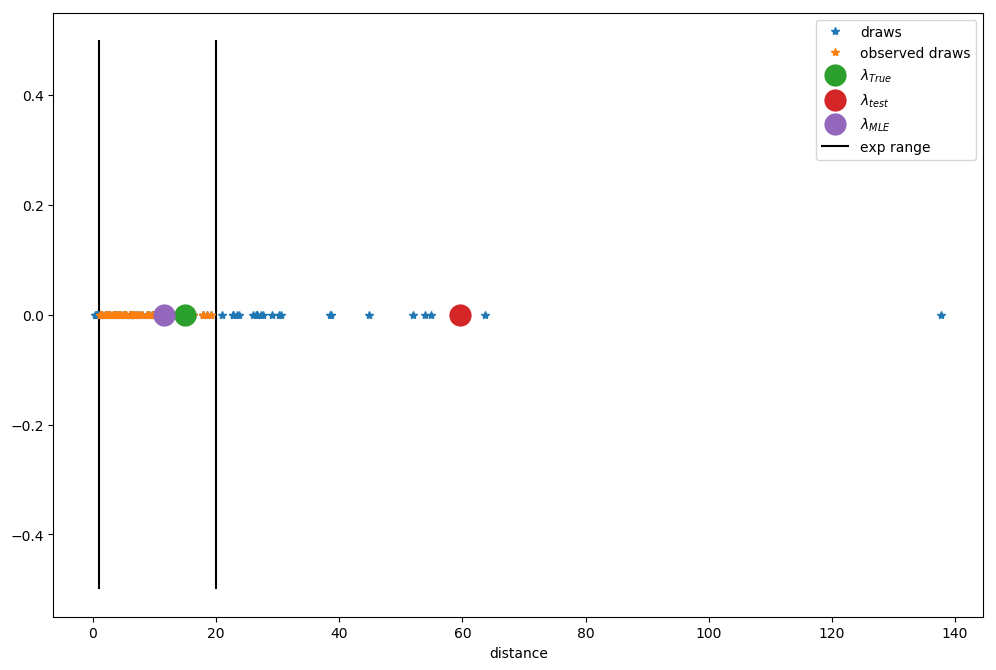

In [11]:
eg_mle_2(lmbd_true=15)